# Stroop Effect

__Background Information__

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

__The Dataset__

The dataset "stroopdata.csv" contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

__1. What is our independent variable? What is our dependent variable?__

Independent variable: __words given__ and the __color__ of each word. 

Dependent variable: the columns __Congruent__ and __Incongruent__ which represent time for congruent and incongruent tasks respectively.


In [2]:
import pandas as pd

# Load the dataset
stroopdata = pd.read_csv("stroopdata.csv")
stroopdata

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [3]:
stroopdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 456.0 bytes


Hence this dataset contains 2 columns namely Congruent and Incongruent each with 24 values (rows) of time taken to recognize the given words, in float type.

__2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.__

Now it’s your chance to try out the Stroop task for yourself. Go to this link, which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

__The hypothesis are:__

Null hypothesis H0: There is no significant difference in time for the population to state the colors of the words in a    congruent or incongruent condition.

Alternative hypothesis H1: there is significant difference in time for the population to state the colors of the words in a    congruent or incongruent condition.

Hence we have ,

          H0: μ1 = μ2
     
          H1: μ1≠ μ2
  
 where μ1 = mean of Congruent data and μ2 = mean of Incongruent data

__Statistical Test to be used:__

I'am going to use Paired T-Test to calculate the t-statistic value between the congruent and incongruent data. Then i will use the computed t-statistic value to compute the p-value , which then will decide whether to reject or fail to reject the null hypothesis.

__Justification__

In this experiment, same set of participants are exposed to 2 different conditions namely, congruent and incongruent. Since i want to test the difference in mean of the same set of people at 2 different conditions namely Congruent and Incongruent,the paired T-Test is the most appropriate one. 

__3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.__

In [4]:
stroopdata.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Congruent Data :    mean = 14.05, median = 14.35 and standard deviation = 3.559

Incongruent Data :  mean = 22.01, median = 21.01 and standard deviation = 4.797

__4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.__

Populating the interactive namespace from numpy and matplotlib


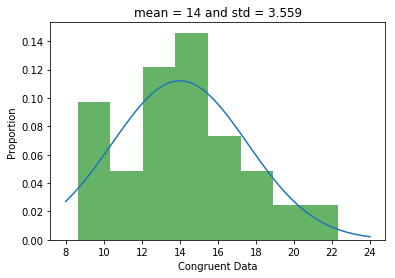

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
from scipy.stats import norm

# Plot the Congruent data with a normal distribution curve around it
x = stroopdata['Congruent']
plt.hist(x, bins=8, normed=True, alpha=0.6, color='g')
y = np.arange(8,24,0.001)
plt.plot(y, norm.pdf(y ,14,3.559))
plt.xlabel("Congruent Data")
plt.ylabel("Proportion")
plt.title('mean = 14 and std = 3.559')
plt.show()

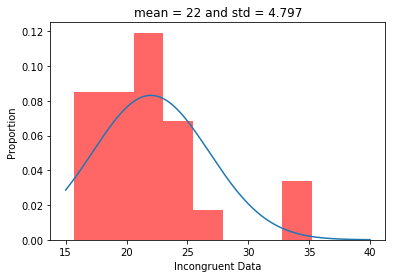

In [8]:
# Plot the Incongruent data with a normal distribution curve around it
x = stroopdata['Incongruent']
plt.hist(x, bins=8, normed=True, alpha=0.6, color='r')
y = np.arange(15,40,0.001)
plt.plot(y, norm.pdf(y ,22,4.797))
plt.xlabel("Incongruent Data")
plt.ylabel("Proportion")
plt.title('mean = 22 and std = 4.797')
plt.show()

As seen from the 2 plots above, the mean and standard deviation of Incongruent data are higher than those of Congruent data. This may be because of higher time taken to find Incongruent data i.e due to Stroop effect. Also the histogram of Congruent data almost resembles the shape of normal distribution curve but the histogram of Incongruent data is somewhat right-skewed.

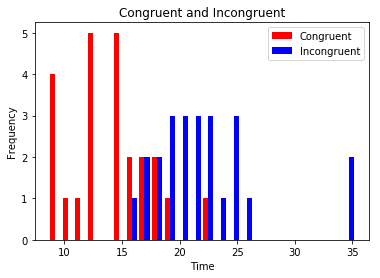

In [9]:
# Plot both histograms on same plot
plt.hist((stroopdata['Congruent'],stroopdata['Incongruent']), 24, color=['red', 'blue'], label=['Congruent','Incongruent'])
plt.legend(prop={'size': 10})
plt.title('Congruent and Incongruent')
plt.ylabel('Frequency')
plt.xlabel('Time')

plt.show()

The above histogram shows that for every participant, reading Congruent is always faster.

__5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?__

In [10]:
from scipy import stats

stats.ttest_rel( stroopdata['Incongruent'],stroopdata['Congruent'])

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

The t-statistic value is 8.02 which  can be used to calculate a p-value.

The p-value in this case is 4.1030005857111781e-08 = 0.00137 , which again is below the standard thresholds of 0.05 or 0.01, so we reject the null hypothesis and we can say there is a statistically significant difference between the mean time taken to read Congruent data and Incongruent data. This means that stroop effect does exist in this experiment. 

__6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!__

Possible explanation for Stroop effect is that the color can enhance/reduce the confidence of participant when reading words resulting in faster/slower reaction. One possible alternative task is the traffic light. If we modify traffic light green(for go) and red(for stop) with GO and STOP. Then compare it with another traffic light: GO and STOP. I am sure the driver would react slower(with more error) in the later case.